# 1、 转换数据范围

In [2]:
import meteva.base as meb
import xarray as xr

infile =  '/home/wanghao/Python/DataProcess/read_data/allsky/data/2021071915/dxa.2021071915.nc'

grd = meb.xarray_to_griddata(meb.read_griddata_from_nc(infile,value_name='rh').sel(level=27))

# change 0,360 to -180,180
# grd.coords['lon'] = (grd.coords['lon'] + 180) % 360 - 180
# grd = grd.sortby(grd.lon)
# print(grd)

grd['lon_adjusted'] = xr.where(grd['lon']>=180, grd['lon']-360, grd['lon'])
grd = (
    grd
    .swap_dims({'lon':'lon_adjusted'})
    .sel(**{'lon_adjusted': sorted(grd.lon_adjusted)})
    .drop('lon'))
grd = grd.rename({'lon_adjusted':'lon'})
print(grd)

# change -180,180 to 0, 360
grd['lon_adjusted'] = xr.where(grd['lon']<0, grd['lon']+360, grd['lon'])
grd = (grd
       .swap_dims({'lon':'lon_adjusted'})
       .sel(**{'lon_adjusted': sorted(grd.lon_adjusted)})
       .drop('lon'))
grd = grd.rename({'lon_adjusted':'lon'})

print(grd)

<xarray.DataArray 'data0' (member: 1, level: 1, time: 1, dtime: 1, lat: 180, lon: 360)>
array([[[[[[ 0.01435621,  0.01448454,  0.01471155, ...,  0.01382859,
             0.01400327,  0.01406664],
           [ 0.02330838,  0.02411048,  0.02476721, ...,  0.02252266,
             0.02256171,  0.02279495],
           [ 0.0185255 ,  0.01872812,  0.01901362, ...,  0.01796091,
             0.01815174,  0.01835755],
           ...,
           [-0.00018802, -0.00019895, -0.00020228, ..., -0.00010888,
            -0.00014208, -0.00016858],
           [ 0.00098732,  0.00098341,  0.00098177, ...,  0.00101432,
             0.00100312,  0.00099393],
           [ 0.00201845,  0.00199411,  0.00196989, ...,  0.0020909 ,
             0.00206682,  0.00204252]]]]]])
Coordinates:
  * member   (member) <U5 'data0'
  * level    (level) float64 27.0
  * time     (time) datetime64[ns] 2005-10-28
  * dtime    (dtime) int64 0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lo

# 2 挑选区域内的数据

In [3]:
SliceData = grd.sel(lat=slice(10,60),
                 lon=slice(70,145))
print(SliceData)

<xarray.DataArray 'data0' (member: 1, level: 1, time: 1, dtime: 1, lat: 50, lon: 76)>
array([[[[[[-2.27599788e+00, -3.75848317e+00, -5.04139090e+00, ...,
             3.45243621e+00,  3.81182766e+00,  4.08735275e+00],
           [-1.55059612e+00, -2.77768135e+00, -3.51807427e+00, ...,
             3.76938486e+00,  4.03202677e+00,  4.07112885e+00],
           [-8.18857789e-01, -1.82096839e+00, -2.41836619e+00, ...,
             4.62800884e+00,  4.65494823e+00,  4.57543230e+00],
           ...,
           [-2.19797287e-02, -2.32500043e-02, -1.98100191e-02, ...,
            -2.52158451e-03, -3.36080021e-03, -3.87734035e-03],
           [-1.63101014e-02, -1.93040743e-02, -1.97189599e-02, ...,
             2.29421232e-04, -6.49239810e-04, -1.40571257e-03],
           [-5.34666516e-03, -5.98085392e-03, -6.71171118e-03, ...,
             3.96844116e-04,  6.91009569e-04,  9.39217338e-04]]]]]])
Coordinates:
  * member   (member) <U5 'data0'
  * level    (level) float64 27.0
  * time     (time) 

# 3、一般格式数据转xarray

In [67]:
#构建测试数据
data0 = np.random.rand(5,3)
data1 = np.ones((5,3))
x = np.arange(110,115,1)
y = np.arange(30,33,1)
da0 = xr.DataArray(data0, coords=[x,y], dims=['lon','lat']) 

da0.coords['pl'] = (850.0)
da0.rename({'lon':'longitude', 'lat': 'latitude', 'pl':'pres'})

<xarray.DataArray (longitude: 5, latitude: 3)>
array([[0.27165089, 0.82024837, 0.66791417],
       [0.60611442, 0.4174169 , 0.902787  ],
       [0.24299244, 0.99399567, 0.70227446],
       [0.76900845, 0.13775515, 0.35984426],
       [0.229064  , 0.11678992, 0.10095797]])
Coordinates:
  * longitude  (longitude) int64 110 111 112 113 114
  * latitude   (latitude) int64 30 31 32
    pres       float64 850.0

# 5、输出netcdf数据

In [21]:
infile =  '/home/wanghao/Python/DataProcess/read_data/allsky/data/2021071915/dxa.2021071915.nc'
grd = meb.xarray_to_griddata(meb.read_griddata_from_nc(infile,value_name='rh').sel(level=[27,28]))
# print(grd)

meb.write_griddata_to_nc(grd, "grd.nc", effectiveNum=10, show=True) 
grd = meb.read_griddata_from_nc('grd.nc', value_name="data0")
grd

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

成功输出至grd.nc


<IPython.core.display.Javascript object>

<xarray.DataArray 'data0' (member: 1, level: 2, time: 1, dtime: 1, lat: 180, lon: 360)>
array([[[[[[ 0.02048205,  0.02042114,  0.0201048 , ...,  0.02112182,
             0.0209551 ,  0.02078238],
           [ 0.02445554,  0.02389654,  0.02291566, ...,  0.02741753,
             0.02673433,  0.02553845],
           [ 0.02162828,  0.02136002,  0.02105   , ...,  0.02235113,
             0.02213415,  0.02187034],
           ...,
           [ 0.00249649,  0.00241829,  0.00233646, ...,  0.00269484,
             0.00263248,  0.0025664 ],
           [-0.00026464, -0.00028488, -0.00030259, ..., -0.0001967 ,
            -0.00022192, -0.00024392],
           [-0.00118801, -0.00115306, -0.00111673, ..., -0.00128468,
            -0.00125343, -0.00122136]]]],



        [[[[ 0.01984735,  0.0196888 ,  0.01954941, ...,  0.02022755,
             0.02010782,  0.0199654 ],
           [ 0.02986952,  0.02696302,  0.0282113 , ...,  0.02870253,
             0.03038332,  0.030016  ],
           [ 0.01573108,  0.01553882,  0.01531651, ...,  0.01609519,
             0.01599   ,  0.0158671 ],
           ...,
           [ 0.00323477,  0.0031752 ,  0.00310949, ...,  0.00339326,
             0.00334158,  0.00328807],
           [ 0.00076368,  0.0007513 ,  0.00074003, ...,  0.00081136,
             0.00079592,  0.00078036],
           [-0.00060809, -0.00057484, -0.00054144, ..., -0.00069929,
            -0.0006696 , -0.0006394 ]]]]]])
Coordinates:
  * member   (member) <U5 'data0'
  * level    (level) float64 27.0 28.0
  * time     (time) datetime64[ns] 2005-10-28
  * dtime    (dtime) int64 0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes:
    long_name:  relative humidity

# 6、坐标设置

In [57]:
import xarray as xr
import pandas as pd
import numpy as np

from reki.format.grib.eccodes import (load_field_from_file,
                                      load_field_from_files)

file_path = '/home/wanghao/Python/Coop_data/GRAPES_GFS/GRAPES_GFS_GMF/Prod-grib/2021123100/ORIG/gmf.gra.2021123100003.grb2'

field = load_field_from_file(
    file_path = file_path,
    parameter = 't',
    level_type = 'pl',
    level = 850
)
field

<xarray.DataArray 't' (latitude: 720, longitude: 1440)>
array([[256.62296875, 256.56296875, 256.58296875, ..., 256.62296875,
        256.65296875, 256.68296875],
       [256.50296875, 256.48296875, 256.50296875, ..., 256.49296875,
        256.50296875, 256.52296875],
       [256.40296875, 256.40296875, 256.40296875, ..., 256.40296875,
        256.41296875, 256.41296875],
       ...,
       [263.01296875, 263.00296875, 262.98296875, ..., 263.04296875,
        263.02296875, 263.01296875],
       [262.68296875, 262.67296875, 262.67296875, ..., 262.68296875,
        262.70296875, 262.69296875],
       [262.34296875, 262.35296875, 262.37296875, ..., 262.35296875,
        262.37296875, 262.33296875]])
Coordinates:
    time        datetime64[ns] 2021-12-31
    step        timedelta64[ns] 03:00:00
    valid_time  datetime64[ns] 2021-12-31T03:00:00
    pl          float64 850.0
  * latitude    (latitude) float64 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Attributes: (12/16)
    GRIB_edition:             2
    GRIB_centre:              babj
    GRIB_subCentre:           0
    GRIB_tablesVersion:       4
    GRIB_localTablesVersion:  0
    GRIB_dataType:            fc
    ...                       ...
    GRIB_step:                3
    GRIB_stepType:            instant
    GRIB_stepUnits:           1
    GRIB_stepRange:           3
    GRIB_endStep:             3
    long_name:                discipline=0 parmcat=0 parm=0

In [34]:
grid_field = field.reset_coords(['valid_time','pl'], drop=True)
grid_field

<xarray.DataArray 't' (latitude: 720, longitude: 1440)>
array([[256.62296875, 256.56296875, 256.58296875, ..., 256.62296875,
        256.65296875, 256.68296875],
       [256.50296875, 256.48296875, 256.50296875, ..., 256.49296875,
        256.50296875, 256.52296875],
       [256.40296875, 256.40296875, 256.40296875, ..., 256.40296875,
        256.41296875, 256.41296875],
       ...,
       [263.01296875, 263.00296875, 262.98296875, ..., 263.04296875,
        263.02296875, 263.01296875],
       [262.68296875, 262.67296875, 262.67296875, ..., 262.68296875,
        262.70296875, 262.69296875],
       [262.34296875, 262.35296875, 262.37296875, ..., 262.35296875,
        262.37296875, 262.33296875]])
Coordinates:
    time       datetime64[ns] 2021-12-31
    step       timedelta64[ns] 03:00:00
  * latitude   (latitude) float64 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
Attributes: (12/16)
    GRIB_edition:             2
    GRIB_centre:              babj
    GRIB_subCentre:           0
    GRIB_tablesVersion:       4
    GRIB_localTablesVersion:  0
    GRIB_dataType:            fc
    ...                       ...
    GRIB_step:                3
    GRIB_stepType:            instant
    GRIB_stepUnits:           1
    GRIB_stepRange:           3
    GRIB_endStep:             3
    long_name:                discipline=0 parmcat=0 parm=0

In [4]:
field = grid_field.expand_dims(['time', 'step'])
field

<xarray.DataArray 't' (time: 1, step: 1, latitude: 720, longitude: 1440)>
array([[[[256.62296875, 256.56296875, 256.58296875, ..., 256.62296875,
          256.65296875, 256.68296875],
         [256.50296875, 256.48296875, 256.50296875, ..., 256.49296875,
          256.50296875, 256.52296875],
         [256.40296875, 256.40296875, 256.40296875, ..., 256.40296875,
          256.41296875, 256.41296875],
         ...,
         [263.01296875, 263.00296875, 262.98296875, ..., 263.04296875,
          263.02296875, 263.01296875],
         [262.68296875, 262.67296875, 262.67296875, ..., 262.68296875,
          262.70296875, 262.69296875],
         [262.34296875, 262.35296875, 262.37296875, ..., 262.35296875,
          262.37296875, 262.33296875]]]])
Coordinates:
  * time       (time) datetime64[ns] 2021-12-31
  * step       (step) timedelta64[ns] 03:00:00
  * latitude   (latitude) float64 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
Attributes: (12/16)
    GRIB_edition:             2
    GRIB_centre:              babj
    GRIB_subCentre:           0
    GRIB_tablesVersion:       4
    GRIB_localTablesVersion:  0
    GRIB_dataType:            fc
    ...                       ...
    GRIB_step:                3
    GRIB_stepType:            instant
    GRIB_stepUnits:           1
    GRIB_stepRange:           3
    GRIB_endStep:             3
    long_name:                discipline=0 parmcat=0 parm=0

In [69]:
data_dir = '/home/wanghao/Python/Coop_data/GRAPES_GFS/GRAPES_GFS_GMF/Prod-grib/'
file_list_24 = [f'{data_dir}/2021123100/ORIG/gmf.gra.2021123100024.grb2',
                f'{data_dir}/2021123106/ORIG/gmf.gra.2021123106024.grb2',
                f'{data_dir}/2021123112/ORIG/gmf.gra.2021123112024.grb2',
                f'{data_dir}/2021123118/ORIG/gmf.gra.2021123118024.grb2',
               ]
file_list_24

field_list = []
for file_path in file_list_24:
    field = load_field_from_file(
        file_path = file_path,
        parameter = 't',
        level_type = 'pl',
        level = 850,).reset_coords(['step','valid_time','pl'], drop=True)
    field_list.append(field)

data_24 = xr.concat(field_list, 'time')
data_24

<xarray.DataArray 't' (time: 4, latitude: 720, longitude: 1440)>
array([[[254.55824219, 254.51824219, 254.52824219, ..., 254.52824219,
         254.53824219, 254.57824219],
        [254.35824219, 254.34824219, 254.35824219, ..., 254.36824219,
         254.36824219, 254.36824219],
        [254.18824219, 254.18824219, 254.18824219, ..., 254.17824219,
         254.18824219, 254.18824219],
        ...,
        [266.06824219, 266.09824219, 266.07824219, ..., 266.07824219,
         266.03824219, 266.03824219],
        [266.00824219, 266.02824219, 265.99824219, ..., 266.01824219,
         266.03824219, 265.99824219],
        [265.80824219, 265.84824219, 266.00824219, ..., 265.95824219,
         265.95824219, 266.00824219]],

       [[253.58431641, 253.55431641, 253.57431641, ..., 253.57431641,
         253.58431641, 253.60431641],
        [253.48431641, 253.47431641, 253.49431641, ..., 253.49431641,
         253.49431641, 253.49431641],
        [253.40431641, 253.40431641, 253.40431641, ..., 253.39431641,
         253.40431641, 253.40431641],
...
        [264.94916016, 265.00916016, 265.03916016, ..., 265.02916016,
         264.96916016, 264.93916016],
        [265.07916016, 265.12916016, 265.12916016, ..., 265.15916016,
         265.15916016, 265.12916016],
        [265.26916016, 265.30916016, 265.45916016, ..., 265.44916016,
         265.48916016, 265.46916016]],

       [[253.93474609, 253.89474609, 253.91474609, ..., 253.91474609,
         253.92474609, 253.95474609],
        [253.79474609, 253.79474609, 253.81474609, ..., 253.80474609,
         253.80474609, 253.80474609],
        [253.67474609, 253.67474609, 253.67474609, ..., 253.66474609,
         253.67474609, 253.67474609],
        ...,
        [264.46474609, 264.46474609, 264.45474609, ..., 264.46474609,
         264.45474609, 264.45474609],
        [264.42474609, 264.45474609, 264.43474609, ..., 264.45474609,
         264.45474609, 264.41474609],
        [264.47474609, 264.34474609, 264.43474609, ..., 264.49474609,
         264.52474609, 264.57474609]]])
Coordinates:
  * time       (time) datetime64[ns] 2021-12-31 ... 2021-12-31T18:00:00
  * latitude   (latitude) float64 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
Attributes: (12/16)
    GRIB_edition:             2
    GRIB_centre:              babj
    GRIB_subCentre:           0
    GRIB_tablesVersion:       4
    GRIB_localTablesVersion:  0
    GRIB_dataType:            fc
    ...                       ...
    GRIB_step:                24
    GRIB_stepType:            instant
    GRIB_stepUnits:           1
    GRIB_stepRange:           24
    GRIB_endStep:             24
    long_name:                discipline=0 parmcat=0 parm=0

In [68]:
file_list_48 = [f'{data_dir}/2021123100/ORIG/gmf.gra.2021123100048.grb2',
                f'{data_dir}/2021123106/ORIG/gmf.gra.2021123106048.grb2',
                f'{data_dir}/2021123112/ORIG/gmf.gra.2021123112048.grb2',
                f'{data_dir}/2021123118/ORIG/gmf.gra.2021123118048.grb2',
               ]

field_list = []
for file_path in file_list_48:
    field = load_field_from_file(
        file_path = file_path,
        parameter = 't',
        level_type = 'pl',
        level = 850,).reset_coords(['step','valid_time','pl'], drop=True)
    field_list.append(field)
data_48 = xr.concat(field_list, 'time')

data_48

<xarray.DataArray 't' (time: 4, latitude: 720, longitude: 1440)>
array([[[253.68035156, 253.64035156, 253.66035156, ..., 253.67035156,
         253.67035156, 253.70035156],
        [253.59035156, 253.60035156, 253.61035156, ..., 253.60035156,
         253.60035156, 253.60035156],
        [253.54035156, 253.54035156, 253.54035156, ..., 253.54035156,
         253.54035156, 253.54035156],
        ...,
        [265.93035156, 265.93035156, 265.92035156, ..., 265.95035156,
         265.94035156, 265.93035156],
        [265.93035156, 265.99035156, 265.98035156, ..., 266.00035156,
         266.04035156, 265.96035156],
        [266.04035156, 266.00035156, 266.05035156, ..., 266.06035156,
         266.08035156, 266.08035156]],

       [[253.29724609, 253.25724609, 253.28724609, ..., 253.26724609,
         253.28724609, 253.33724609],
        [253.21724609, 253.21724609, 253.22724609, ..., 253.21724609,
         253.21724609, 253.21724609],
        [253.13724609, 253.13724609, 253.13724609, ..., 253.13724609,
         253.13724609, 253.13724609],
...
        [264.91810547, 264.91810547, 264.91810547, ..., 264.90810547,
         264.91810547, 264.90810547],
        [264.95810547, 264.96810547, 264.94810547, ..., 264.96810547,
         264.95810547, 264.93810547],
        [264.99810547, 265.02810547, 265.03810547, ..., 265.02810547,
         265.01810547, 265.00810547]],

       [[253.32916016, 253.28916016, 253.26916016, ..., 253.28916016,
         253.30916016, 253.34916016],
        [253.38916016, 253.38916016, 253.39916016, ..., 253.39916016,
         253.39916016, 253.39916016],
        [253.42916016, 253.42916016, 253.42916016, ..., 253.42916016,
         253.43916016, 253.43916016],
        ...,
        [264.52916016, 264.52916016, 264.52916016, ..., 264.51916016,
         264.52916016, 264.52916016],
        [264.53916016, 264.54916016, 264.53916016, ..., 264.55916016,
         264.54916016, 264.52916016],
        [264.57916016, 264.58916016, 264.56916016, ..., 264.59916016,
         264.57916016, 264.54916016]]])
Coordinates:
  * time       (time) datetime64[ns] 2021-12-31 ... 2021-12-31T18:00:00
  * latitude   (latitude) float64 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
Attributes: (12/16)
    GRIB_edition:             2
    GRIB_centre:              babj
    GRIB_subCentre:           0
    GRIB_tablesVersion:       4
    GRIB_localTablesVersion:  0
    GRIB_dataType:            fc
    ...                       ...
    GRIB_step:                48
    GRIB_stepType:            instant
    GRIB_stepUnits:           1
    GRIB_stepRange:           48
    GRIB_endStep:             48
    long_name:                discipline=0 parmcat=0 parm=0

In [70]:
data_24.coords['step'] = 24
data_48.coords['step'] = 48
data_24

data_combine = xr.concat([data_24,data_48],'step')
data_combine

<xarray.DataArray 't' (step: 2, time: 4, latitude: 720, longitude: 1440)>
array([[[[254.55824219, 254.51824219, 254.52824219, ..., 254.52824219,
          254.53824219, 254.57824219],
         [254.35824219, 254.34824219, 254.35824219, ..., 254.36824219,
          254.36824219, 254.36824219],
         [254.18824219, 254.18824219, 254.18824219, ..., 254.17824219,
          254.18824219, 254.18824219],
         ...,
         [266.06824219, 266.09824219, 266.07824219, ..., 266.07824219,
          266.03824219, 266.03824219],
         [266.00824219, 266.02824219, 265.99824219, ..., 266.01824219,
          266.03824219, 265.99824219],
         [265.80824219, 265.84824219, 266.00824219, ..., 265.95824219,
          265.95824219, 266.00824219]],

        [[253.58431641, 253.55431641, 253.57431641, ..., 253.57431641,
          253.58431641, 253.60431641],
         [253.48431641, 253.47431641, 253.49431641, ..., 253.49431641,
          253.49431641, 253.49431641],
         [253.40431641, 253.40431641, 253.40431641, ..., 253.39431641,
          253.40431641, 253.40431641],
...
         [264.91810547, 264.91810547, 264.91810547, ..., 264.90810547,
          264.91810547, 264.90810547],
         [264.95810547, 264.96810547, 264.94810547, ..., 264.96810547,
          264.95810547, 264.93810547],
         [264.99810547, 265.02810547, 265.03810547, ..., 265.02810547,
          265.01810547, 265.00810547]],

        [[253.32916016, 253.28916016, 253.26916016, ..., 253.28916016,
          253.30916016, 253.34916016],
         [253.38916016, 253.38916016, 253.39916016, ..., 253.39916016,
          253.39916016, 253.39916016],
         [253.42916016, 253.42916016, 253.42916016, ..., 253.42916016,
          253.43916016, 253.43916016],
         ...,
         [264.52916016, 264.52916016, 264.52916016, ..., 264.51916016,
          264.52916016, 264.52916016],
         [264.53916016, 264.54916016, 264.53916016, ..., 264.55916016,
          264.54916016, 264.52916016],
         [264.57916016, 264.58916016, 264.56916016, ..., 264.59916016,
          264.57916016, 264.54916016]]]])
Coordinates:
  * time       (time) datetime64[ns] 2021-12-31 ... 2021-12-31T18:00:00
  * latitude   (latitude) float64 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * step       (step) int64 24 48
Attributes: (12/16)
    GRIB_edition:             2
    GRIB_centre:              babj
    GRIB_subCentre:           0
    GRIB_tablesVersion:       4
    GRIB_localTablesVersion:  0
    GRIB_dataType:            fc
    ...                       ...
    GRIB_step:                24
    GRIB_stepType:            instant
    GRIB_stepUnits:           1
    GRIB_stepRange:           24
    GRIB_endStep:             24
    long_name:                discipline=0 parmcat=0 parm=0

In [72]:
data_combine = data_combine.transpose('time','step',...)
data_combine

<xarray.DataArray 't' (time: 4, step: 2, latitude: 720, longitude: 1440)>
array([[[[254.55824219, 254.51824219, 254.52824219, ..., 254.52824219,
          254.53824219, 254.57824219],
         [254.35824219, 254.34824219, 254.35824219, ..., 254.36824219,
          254.36824219, 254.36824219],
         [254.18824219, 254.18824219, 254.18824219, ..., 254.17824219,
          254.18824219, 254.18824219],
         ...,
         [266.06824219, 266.09824219, 266.07824219, ..., 266.07824219,
          266.03824219, 266.03824219],
         [266.00824219, 266.02824219, 265.99824219, ..., 266.01824219,
          266.03824219, 265.99824219],
         [265.80824219, 265.84824219, 266.00824219, ..., 265.95824219,
          265.95824219, 266.00824219]],

        [[253.68035156, 253.64035156, 253.66035156, ..., 253.67035156,
          253.67035156, 253.70035156],
         [253.59035156, 253.60035156, 253.61035156, ..., 253.60035156,
          253.60035156, 253.60035156],
         [253.54035156, 253.54035156, 253.54035156, ..., 253.54035156,
          253.54035156, 253.54035156],
...
         [264.46474609, 264.46474609, 264.45474609, ..., 264.46474609,
          264.45474609, 264.45474609],
         [264.42474609, 264.45474609, 264.43474609, ..., 264.45474609,
          264.45474609, 264.41474609],
         [264.47474609, 264.34474609, 264.43474609, ..., 264.49474609,
          264.52474609, 264.57474609]],

        [[253.32916016, 253.28916016, 253.26916016, ..., 253.28916016,
          253.30916016, 253.34916016],
         [253.38916016, 253.38916016, 253.39916016, ..., 253.39916016,
          253.39916016, 253.39916016],
         [253.42916016, 253.42916016, 253.42916016, ..., 253.42916016,
          253.43916016, 253.43916016],
         ...,
         [264.52916016, 264.52916016, 264.52916016, ..., 264.51916016,
          264.52916016, 264.52916016],
         [264.53916016, 264.54916016, 264.53916016, ..., 264.55916016,
          264.54916016, 264.52916016],
         [264.57916016, 264.58916016, 264.56916016, ..., 264.59916016,
          264.57916016, 264.54916016]]]])
Coordinates:
  * time       (time) datetime64[ns] 2021-12-31 ... 2021-12-31T18:00:00
  * latitude   (latitude) float64 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * step       (step) int64 24 48
Attributes: (12/16)
    GRIB_edition:             2
    GRIB_centre:              babj
    GRIB_subCentre:           0
    GRIB_tablesVersion:       4
    GRIB_localTablesVersion:  0
    GRIB_dataType:            fc
    ...                       ...
    GRIB_step:                24
    GRIB_stepType:            instant
    GRIB_stepUnits:           1
    GRIB_stepRange:           24
    GRIB_endStep:             24
    long_name:                discipline=0 parmcat=0 parm=0

In [73]:
data_sel = data_combine.sel(
    time = '2021-12-31 06:00:00',
    step = 24
)
data_sel

<xarray.DataArray 't' (latitude: 720, longitude: 1440)>
array([[253.58431641, 253.55431641, 253.57431641, ..., 253.57431641,
        253.58431641, 253.60431641],
       [253.48431641, 253.47431641, 253.49431641, ..., 253.49431641,
        253.49431641, 253.49431641],
       [253.40431641, 253.40431641, 253.40431641, ..., 253.39431641,
        253.40431641, 253.40431641],
       ...,
       [265.56431641, 265.59431641, 265.62431641, ..., 265.61431641,
        265.56431641, 265.53431641],
       [265.62431641, 265.69431641, 265.68431641, ..., 265.68431641,
        265.72431641, 265.65431641],
       [265.64431641, 265.71431641, 265.78431641, ..., 265.79431641,
        265.82431641, 265.83431641]])
Coordinates:
    time       datetime64[ns] 2021-12-31T06:00:00
  * latitude   (latitude) float64 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
    step       int64 24
Attributes: (12/16)
    GRIB_edition:             2
    GRIB_centre:              babj
    GRIB_subCentre:           0
    GRIB_tablesVersion:       4
    GRIB_localTablesVersion:  0
    GRIB_dataType:            fc
    ...                       ...
    GRIB_step:                24
    GRIB_stepType:            instant
    GRIB_stepUnits:           1
    GRIB_stepRange:           24
    GRIB_endStep:             24
    long_name:                discipline=0 parmcat=0 parm=0

# 7、DataArray构造实例
<!--
    data_vars： 是一个字典，key是变量的名称，value是DataArray，或者能转换成dataArray的数据
    coords：是一个与数据变量形式相同的字典。
    attrs：一个字典
>

In [7]:
import xarray as xr
import h5py

CLM_infile    = 'F:/Python/Coop_data/OBS/FY4B/AGRI/L2/CLM/2022/20220701/FY4B-_AGRI--_N_DISK_1330E_L2-_CLM-_MULT_NOM_20220701020000_20220701021459_4000M_V0001.NC'
CTT_infile    = 'F:/Python/Coop_data/OBS/FY4B/AGRI/L2/CTT/2022/20220701/FY4B-_AGRI--_N_DISK_1330E_L2-_CTT-_MULT_NOM_20220701020000_20220701021459_4000M_V0001.NC'
latlon_infile = 'F:/Python/Coop_data/OBS/FY4B/AGRI/FY4A_B/FY4B_OBI_4000M_CenLon_133_NOM_LATLON.HDF'

CLM_fili = xr.open_dataset(CLM_infile)
CLM = CLM_fili['CLM'].values
CTT_fili = xr.open_dataset(CTT_infile)
CTT = CTT_fili['CTT'].values
latlon_fili = h5py.File(latlon_infile)
Lat, Lon = latlon_fili['Lat'][:], latlon_fili['Lon'][:]

ds = xr.Dataset(
    data_vars = {
        'CLM' : (['x', 'y'], CLM),
        'CTT' : (['x', 'y'], CTT)
    },
    coords = {
        'lon' : (['x', 'y'], Lon),
        'lat' : (['x', 'y'], Lat),
    }
)
ds


<xarray.Dataset>
Dimensions:  (x: 2748, y: 2748)
Coordinates:
    lon      (x, y) float32 6.553e+04 6.553e+04 ... 6.553e+04 6.553e+04
    lat      (x, y) float32 6.553e+04 6.553e+04 ... 6.553e+04 6.553e+04
Dimensions without coordinates: x, y
Data variables:
    CLM      (x, y) float32 126.0 126.0 126.0 126.0 ... 126.0 126.0 126.0 126.0
    CTT      (x, y) float32 6.554e+04 6.554e+04 ... 6.554e+04 6.554e+04

# 8、插值

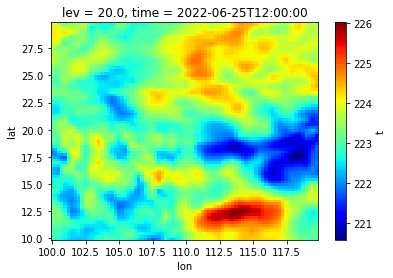

In [16]:
from xgrads import CtlDescriptor, open_CtlDataset
import numpy as np

# infile = '/home/wanghao/Python/Coop_data/GRAPES_3km/AGRI/2022062512/post.ctl_202206251202400'
infile = 'F:/Python/Coop_data/GRAPES_3km/AGRI/2022062512/post.ctl_202206251200000'
dset = open_CtlDataset(CtlDescriptor(file=infile))

t_field = dset['t'].interp(lat=np.arange(10,30,0.25), lon=np.arange(100,120,0.25), method='linear')

t_field[0,1,...].plot(cmap='jet')